# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 18 vs Chr 18p11

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_18': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-4L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-5L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\ch

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_18']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-8L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-11L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-13L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-16L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-25L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-7L.bmp',
 '

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_18': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_18', 'chr_18_p11_deletion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_18
   Train: 
        181228-i(18)(q10)+18-10L.bmp
        181228-i(18)(q10)+18-11L.bmp
        181228-i(18)(q10)+18-12L.bmp
        181228-i(18)(q10)+18-13L.bmp
        181228-i(18)(q10)+18-2L.bmp
        181228-i(18)(q10)+18-3L.bmp
        181228-i(18)(q10)+18-4L.bmp
        181228-i(18)(q10)+18-5L.bmp
        181228-i(18)(q10)+18-7L.bmp
        181228-i(18)(q10)+18-9L.bmp
        183873-del(18)(p11)-10L.bmp
        183873-del(18)(p11)-12L.bmp
        183873-del(18)(p11)-14L.bmp
        183873-del(18)(p11)-15L.bmp
        183873-del(18)(p11)-17L.bmp
        183873-del(18)(p11)-18L.bmp
        183873-del(18)(p11)-19L.bmp
        183873-del(18)(p11)-1L.bmp
        183873-del(18)(p11)-20L.bmp
        183873-del(18)(p11)-21L.bmp
        183873-del(18)(p11)-22L.bmp
        183873-del(18)(p11)-23L.bmp
        183873-del(18)(p11)-24L.bmp
        183873-del(18)(p11)-2L.bmp
        183873-del(18)(p11)-4L.bmp
        183873-del(18)(p11)-5L.bmp
        183873-del(18)(p11)-6

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

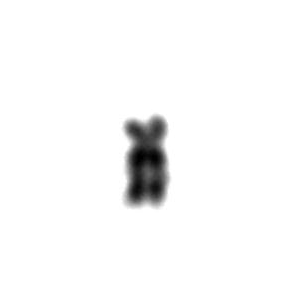

In [12]:
image['chr_18'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [13]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [14]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [15]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_18': 0, 
               'chr_18_p11_deletion': 1
               }

In [19]:
chromConvert_reverse = {
                0: 'chr_18',
                1: 'chr_18_p11_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

200

In [25]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [26]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [29]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [30]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=2000, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/2000
4/4 [==============================] - 7s 605ms/step - loss: 965.4438 - accuracy: 0.5600 - val_loss: 281.8391 - val_accuracy: 0.2941
Epoch 2/2000
4/4 [==============================] - 1s 124ms/step - loss: 100.1994 - accuracy: 0.5700 - val_loss: 25.2257 - val_accuracy: 0.7059
Epoch 3/2000
4/4 [==============================] - 1s 116ms/step - loss: 17.7289 - accuracy: 0.5200 - val_loss: 1.7203 - val_accuracy: 0.7059
Epoch 4/2000
4/4 [==============================] - 1s 118ms/step - loss: 1.0242 - accuracy: 0.7050 - val_loss: 0.6295 - val_accuracy: 0.7255
Epoch 5/2000
4/4 [==============================] - 1s 114ms/step - loss: 0.6035 - accuracy: 0.7300 - val_loss: 0.4729 - val_accuracy: 0.6863
Epoch 6/2000
4/4 [==============================] - 1s 113ms/step - loss: 0.3252 - accuracy: 0.8400 - val_loss: 13.8444 - val_accuracy: 0.7059
Epoch 7/2000
4/4 [==============================] - 1s 116ms/step - loss: 3.9328 - accuracy: 0.7800 - val_loss: 0.4470 - val_accuracy: 0.80

Epoch 58/2000
4/4 [==============================] - 1s 118ms/step - loss: 1.2157e-05 - accuracy: 1.0000 - val_loss: 0.7210 - val_accuracy: 0.9020
Epoch 59/2000
4/4 [==============================] - 1s 115ms/step - loss: 1.1807e-05 - accuracy: 1.0000 - val_loss: 0.7210 - val_accuracy: 0.9020
Epoch 60/2000
4/4 [==============================] - 1s 110ms/step - loss: 1.1411e-05 - accuracy: 1.0000 - val_loss: 0.7214 - val_accuracy: 0.9020
Epoch 61/2000
4/4 [==============================] - 1s 116ms/step - loss: 1.1090e-05 - accuracy: 1.0000 - val_loss: 0.7219 - val_accuracy: 0.9020
Epoch 62/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.0808e-05 - accuracy: 1.0000 - val_loss: 0.7225 - val_accuracy: 0.9020
Epoch 63/2000
4/4 [==============================] - 1s 114ms/step - loss: 1.0509e-05 - accuracy: 1.0000 - val_loss: 0.7229 - val_accuracy: 0.9020
Epoch 64/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.0207e-05 - accuracy: 1.0000 - val_loss: 0

4/4 [==============================] - 1s 116ms/step - loss: 1.4788e-06 - accuracy: 1.0000 - val_loss: 0.7794 - val_accuracy: 0.8824
Epoch 169/2000
4/4 [==============================] - 1s 108ms/step - loss: 1.4496e-06 - accuracy: 1.0000 - val_loss: 0.7795 - val_accuracy: 0.8824
Epoch 170/2000
4/4 [==============================] - 1s 129ms/step - loss: 1.4287e-06 - accuracy: 1.0000 - val_loss: 0.7794 - val_accuracy: 0.8824
Epoch 171/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.4043e-06 - accuracy: 1.0000 - val_loss: 0.7794 - val_accuracy: 0.8824
Epoch 172/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.3786e-06 - accuracy: 1.0000 - val_loss: 0.7794 - val_accuracy: 0.8824
Epoch 173/2000
4/4 [==============================] - 1s 115ms/step - loss: 1.3596e-06 - accuracy: 1.0000 - val_loss: 0.7794 - val_accuracy: 0.8824
Epoch 174/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.3411e-06 - accuracy: 1.0000 - val_loss: 0.7794 - 

4/4 [==============================] - 1s 119ms/step - loss: 3.2663e-07 - accuracy: 1.0000 - val_loss: 0.7789 - val_accuracy: 0.8824
Epoch 279/2000
4/4 [==============================] - 1s 116ms/step - loss: 3.2544e-07 - accuracy: 1.0000 - val_loss: 0.7787 - val_accuracy: 0.8824
Epoch 280/2000
4/4 [==============================] - 1s 118ms/step - loss: 3.2067e-07 - accuracy: 1.0000 - val_loss: 0.7786 - val_accuracy: 0.8824
Epoch 281/2000
4/4 [==============================] - 1s 124ms/step - loss: 3.1590e-07 - accuracy: 1.0000 - val_loss: 0.7788 - val_accuracy: 0.8824
Epoch 282/2000
4/4 [==============================] - 1s 109ms/step - loss: 3.1531e-07 - accuracy: 1.0000 - val_loss: 0.7789 - val_accuracy: 0.8824
Epoch 283/2000
4/4 [==============================] - 1s 110ms/step - loss: 3.1233e-07 - accuracy: 1.0000 - val_loss: 0.7789 - val_accuracy: 0.8824
Epoch 284/2000
4/4 [==============================] - 1s 130ms/step - loss: 3.0935e-07 - accuracy: 1.0000 - val_loss: 0.7787 - 

4/4 [==============================] - 1s 111ms/step - loss: 1.3053e-07 - accuracy: 1.0000 - val_loss: 0.7537 - val_accuracy: 0.8824
Epoch 389/2000
4/4 [==============================] - 1s 112ms/step - loss: 1.3053e-07 - accuracy: 1.0000 - val_loss: 0.7533 - val_accuracy: 0.8824
Epoch 390/2000
4/4 [==============================] - 1s 138ms/step - loss: 1.2934e-07 - accuracy: 1.0000 - val_loss: 0.7529 - val_accuracy: 0.8824
Epoch 391/2000
4/4 [==============================] - 1s 114ms/step - loss: 1.2696e-07 - accuracy: 1.0000 - val_loss: 0.7525 - val_accuracy: 0.8824
Epoch 392/2000
4/4 [==============================] - 1s 117ms/step - loss: 1.2636e-07 - accuracy: 1.0000 - val_loss: 0.7524 - val_accuracy: 0.8824
Epoch 393/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.2517e-07 - accuracy: 1.0000 - val_loss: 0.7522 - val_accuracy: 0.8824
Epoch 394/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.2398e-07 - accuracy: 1.0000 - val_loss: 0.7521 - 

4/4 [==============================] - 1s 129ms/step - loss: 6.9737e-08 - accuracy: 1.0000 - val_loss: 0.7363 - val_accuracy: 0.8824
Epoch 499/2000
4/4 [==============================] - 1s 119ms/step - loss: 6.9737e-08 - accuracy: 1.0000 - val_loss: 0.7362 - val_accuracy: 0.8824
Epoch 500/2000
4/4 [==============================] - 1s 133ms/step - loss: 6.9737e-08 - accuracy: 1.0000 - val_loss: 0.7361 - val_accuracy: 0.8824
Epoch 501/2000
4/4 [==============================] - 1s 135ms/step - loss: 6.9737e-08 - accuracy: 1.0000 - val_loss: 0.7361 - val_accuracy: 0.8824
Epoch 502/2000
4/4 [==============================] - 1s 127ms/step - loss: 6.9737e-08 - accuracy: 1.0000 - val_loss: 0.7359 - val_accuracy: 0.8824
Epoch 503/2000
4/4 [==============================] - 1s 123ms/step - loss: 6.9141e-08 - accuracy: 1.0000 - val_loss: 0.7358 - val_accuracy: 0.8824
Epoch 504/2000
4/4 [==============================] - 1s 118ms/step - loss: 6.9141e-08 - accuracy: 1.0000 - val_loss: 0.7356 - 

4/4 [==============================] - 1s 124ms/step - loss: 4.2319e-08 - accuracy: 1.0000 - val_loss: 0.7260 - val_accuracy: 0.8824
Epoch 609/2000
4/4 [==============================] - 1s 126ms/step - loss: 4.2319e-08 - accuracy: 1.0000 - val_loss: 0.7258 - val_accuracy: 0.8824
Epoch 610/2000
4/4 [==============================] - 1s 139ms/step - loss: 4.2319e-08 - accuracy: 1.0000 - val_loss: 0.7257 - val_accuracy: 0.8824
Epoch 611/2000
4/4 [==============================] - 1s 114ms/step - loss: 4.2319e-08 - accuracy: 1.0000 - val_loss: 0.7256 - val_accuracy: 0.8824
Epoch 612/2000
4/4 [==============================] - 1s 108ms/step - loss: 4.2319e-08 - accuracy: 1.0000 - val_loss: 0.7255 - val_accuracy: 0.8824
Epoch 613/2000
4/4 [==============================] - 1s 111ms/step - loss: 4.1723e-08 - accuracy: 1.0000 - val_loss: 0.7254 - val_accuracy: 0.8824
Epoch 614/2000
4/4 [==============================] - 1s 110ms/step - loss: 4.1723e-08 - accuracy: 1.0000 - val_loss: 0.7253 - 

4/4 [==============================] - 1s 119ms/step - loss: 2.3246e-08 - accuracy: 1.0000 - val_loss: 0.7148 - val_accuracy: 0.8824
Epoch 719/2000
4/4 [==============================] - 1s 131ms/step - loss: 2.2650e-08 - accuracy: 1.0000 - val_loss: 0.7147 - val_accuracy: 0.8824
Epoch 720/2000
4/4 [==============================] - 1s 119ms/step - loss: 2.2650e-08 - accuracy: 1.0000 - val_loss: 0.7146 - val_accuracy: 0.8824
Epoch 721/2000
4/4 [==============================] - 1s 130ms/step - loss: 2.2650e-08 - accuracy: 1.0000 - val_loss: 0.7145 - val_accuracy: 0.8824
Epoch 722/2000
4/4 [==============================] - 1s 133ms/step - loss: 2.2650e-08 - accuracy: 1.0000 - val_loss: 0.7144 - val_accuracy: 0.8824
Epoch 723/2000
4/4 [==============================] - 1s 136ms/step - loss: 2.2650e-08 - accuracy: 1.0000 - val_loss: 0.7144 - val_accuracy: 0.8824
Epoch 724/2000
4/4 [==============================] - 1s 116ms/step - loss: 2.2650e-08 - accuracy: 1.0000 - val_loss: 0.7144 - 

4/4 [==============================] - 1s 118ms/step - loss: 1.3709e-08 - accuracy: 1.0000 - val_loss: 0.7083 - val_accuracy: 0.8824
Epoch 829/2000
4/4 [==============================] - 1s 113ms/step - loss: 1.3709e-08 - accuracy: 1.0000 - val_loss: 0.7083 - val_accuracy: 0.8824
Epoch 830/2000
4/4 [==============================] - 1s 122ms/step - loss: 1.3709e-08 - accuracy: 1.0000 - val_loss: 0.7083 - val_accuracy: 0.8824
Epoch 831/2000
4/4 [==============================] - 1s 115ms/step - loss: 1.3709e-08 - accuracy: 1.0000 - val_loss: 0.7082 - val_accuracy: 0.8824
Epoch 832/2000
4/4 [==============================] - 1s 107ms/step - loss: 1.3709e-08 - accuracy: 1.0000 - val_loss: 0.7081 - val_accuracy: 0.8824
Epoch 833/2000
4/4 [==============================] - 1s 114ms/step - loss: 1.3709e-08 - accuracy: 1.0000 - val_loss: 0.7081 - val_accuracy: 0.8824
Epoch 834/2000
4/4 [==============================] - 1s 126ms/step - loss: 1.3709e-08 - accuracy: 1.0000 - val_loss: 0.7081 - 

4/4 [==============================] - 1s 114ms/step - loss: 8.9407e-09 - accuracy: 1.0000 - val_loss: 0.7108 - val_accuracy: 0.9020
Epoch 939/2000
4/4 [==============================] - 1s 115ms/step - loss: 8.9407e-09 - accuracy: 1.0000 - val_loss: 0.7108 - val_accuracy: 0.9020
Epoch 940/2000
4/4 [==============================] - 1s 115ms/step - loss: 8.9407e-09 - accuracy: 1.0000 - val_loss: 0.7109 - val_accuracy: 0.9020
Epoch 941/2000
4/4 [==============================] - 1s 115ms/step - loss: 8.9407e-09 - accuracy: 1.0000 - val_loss: 0.7109 - val_accuracy: 0.9020
Epoch 942/2000
4/4 [==============================] - 1s 124ms/step - loss: 8.9407e-09 - accuracy: 1.0000 - val_loss: 0.7110 - val_accuracy: 0.9020
Epoch 943/2000
4/4 [==============================] - 1s 118ms/step - loss: 8.9407e-09 - accuracy: 1.0000 - val_loss: 0.7110 - val_accuracy: 0.9020
Epoch 944/2000
4/4 [==============================] - 1s 114ms/step - loss: 8.9407e-09 - accuracy: 1.0000 - val_loss: 0.7111 - 

4/4 [==============================] - 1s 117ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.7183 - val_accuracy: 0.9020
Epoch 1049/2000
4/4 [==============================] - 1s 126ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.7185 - val_accuracy: 0.9020
Epoch 1050/2000
4/4 [==============================] - 1s 116ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.7186 - val_accuracy: 0.9020
Epoch 1051/2000
4/4 [==============================] - 1s 110ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.7187 - val_accuracy: 0.9020
Epoch 1052/2000
4/4 [==============================] - 1s 120ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.7188 - val_accuracy: 0.9020
Epoch 1053/2000
4/4 [==============================] - 1s 116ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.7189 - val_accuracy: 0.9020
Epoch 1054/2000
4/4 [==============================] - 1s 115ms/step - loss: 3.5763e-09 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 119ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7235 - val_accuracy: 0.9020
Epoch 1104/2000
4/4 [==============================] - 1s 101ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7235 - val_accuracy: 0.9020
Epoch 1105/2000
4/4 [==============================] - 1s 99ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7235 - val_accuracy: 0.9020
Epoch 1106/2000
4/4 [==============================] - 1s 104ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7236 - val_accuracy: 0.9020
Epoch 1107/2000
4/4 [==============================] - 1s 110ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7236 - val_accuracy: 0.9020
Epoch 1108/2000
4/4 [==============================] - 1s 103ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7237 - val_accuracy: 0.9020
Epoch 1109/2000
4/4 [==============================] - 1s 111ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.72

4/4 [==============================] - 1s 112ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7297 - val_accuracy: 0.9020
Epoch 1214/2000
4/4 [==============================] - 1s 107ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7298 - val_accuracy: 0.9020
Epoch 1215/2000
4/4 [==============================] - 1s 104ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7298 - val_accuracy: 0.9020
Epoch 1216/2000
4/4 [==============================] - 1s 111ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7299 - val_accuracy: 0.9020
Epoch 1217/2000
4/4 [==============================] - 1s 112ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7300 - val_accuracy: 0.9020
Epoch 1218/2000
4/4 [==============================] - 1s 111ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7300 - val_accuracy: 0.9020
Epoch 1219/2000
4/4 [==============================] - 1s 107ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 111ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7346 - val_accuracy: 0.9020
Epoch 1269/2000
4/4 [==============================] - 1s 106ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7346 - val_accuracy: 0.9020
Epoch 1270/2000
4/4 [==============================] - 1s 119ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7347 - val_accuracy: 0.9020
Epoch 1271/2000
4/4 [==============================] - 1s 103ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7348 - val_accuracy: 0.9020
Epoch 1272/2000
4/4 [==============================] - 1s 114ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7348 - val_accuracy: 0.9020
Epoch 1273/2000
4/4 [==============================] - 1s 106ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7349 - val_accuracy: 0.9020
Epoch 1274/2000
4/4 [==============================] - 1s 118ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 114ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7388 - val_accuracy: 0.9020
Epoch 1324/2000
4/4 [==============================] - 1s 109ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7389 - val_accuracy: 0.9020
Epoch 1325/2000
4/4 [==============================] - 1s 109ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7391 - val_accuracy: 0.9020
Epoch 1326/2000
4/4 [==============================] - 1s 110ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7391 - val_accuracy: 0.9020
Epoch 1327/2000
4/4 [==============================] - 1s 114ms/step - loss: 2.3842e-09 - accuracy: 1.0000 - val_loss: 0.7392 - val_accuracy: 0.9020
Epoch 1328/2000
4/4 [==============================] - 1s 116ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7392 - val_accuracy: 0.9020
Epoch 1329/2000
4/4 [==============================] - 1s 105ms/step - loss: 1.7881e-09 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 111ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7422 - val_accuracy: 0.9020
Epoch 1379/2000
4/4 [==============================] - 1s 110ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7423 - val_accuracy: 0.9020
Epoch 1380/2000
4/4 [==============================] - 1s 119ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7423 - val_accuracy: 0.9020
Epoch 1381/2000
4/4 [==============================] - 1s 115ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7424 - val_accuracy: 0.9020
Epoch 1382/2000
4/4 [==============================] - 1s 116ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7424 - val_accuracy: 0.9020
Epoch 1383/2000
4/4 [==============================] - 1s 113ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7424 - val_accuracy: 0.9020
Epoch 1384/2000
4/4 [==============================] - 1s 114ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 117ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7439 - val_accuracy: 0.9020
Epoch 1434/2000
4/4 [==============================] - 1s 120ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7440 - val_accuracy: 0.9020
Epoch 1435/2000
4/4 [==============================] - 1s 117ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7440 - val_accuracy: 0.9020
Epoch 1436/2000
4/4 [==============================] - 1s 122ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7440 - val_accuracy: 0.9020
Epoch 1437/2000
4/4 [==============================] - 1s 117ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7440 - val_accuracy: 0.9020
Epoch 1438/2000
4/4 [==============================] - 1s 113ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7442 - val_accuracy: 0.9020
Epoch 1439/2000
4/4 [==============================] - 1s 114ms/step - loss: 5.9605e-10 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 116ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7443 - val_accuracy: 0.9020
Epoch 1489/2000
4/4 [==============================] - 1s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7442 - val_accuracy: 0.9020
Epoch 1490/2000
4/4 [==============================] - 1s 112ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7442 - val_accuracy: 0.9020
Epoch 1491/2000
4/4 [==============================] - 1s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7442 - val_accuracy: 0.9020
Epoch 1492/2000
4/4 [==============================] - 1s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7442 - val_accuracy: 0.9020
Epoch 1493/2000
4/4 [==============================] - 1s 115ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7442 - val_accuracy: 0.9020
Epoch 1494/2000
4/4 [==============================] - 1s 118ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 204ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7438 - val_accuracy: 0.9020
Epoch 1544/2000
4/4 [==============================] - 1s 134ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7438 - val_accuracy: 0.9020
Epoch 1545/2000
4/4 [==============================] - 1s 115ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7438 - val_accuracy: 0.9020
Epoch 1546/2000
4/4 [==============================] - 1s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7438 - val_accuracy: 0.9020
Epoch 1547/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7437 - val_accuracy: 0.9020
Epoch 1548/2000
4/4 [==============================] - 0s 118ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7437 - val_accuracy: 0.9020
Epoch 1549/2000
4/4 [==============================] - 1s 149ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 116ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.9020
Epoch 1599/2000
4/4 [==============================] - 1s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.9020
Epoch 1600/2000
4/4 [==============================] - 1s 111ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.9020
Epoch 1601/2000
4/4 [==============================] - 1s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.9020
Epoch 1602/2000
4/4 [==============================] - 1s 171ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.9020
Epoch 1603/2000
4/4 [==============================] - 1s 120ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7418 - val_accuracy: 0.9020
Epoch 1604/2000
4/4 [==============================] - 1s 388ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

Epoch 1708/2000
4/4 [==============================] - 1s 105ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.9020
Epoch 1709/2000
4/4 [==============================] - 1s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.9020
Epoch 1710/2000
4/4 [==============================] - 1s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.9020
Epoch 1711/2000
4/4 [==============================] - 1s 102ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.9020
Epoch 1712/2000
4/4 [==============================] - 1s 107ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.9020
Epoch 1713/2000
4/4 [==============================] - 1s 99ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7405 - val_accuracy: 0.9020
Epoch 1714/2000
4/4 [==============================] - 1s 107ms/step - loss: 0.0000e+00 - accuracy: 1.0000 

4/4 [==============================] - 1s 102ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7392 - val_accuracy: 0.9020
Epoch 1764/2000
4/4 [==============================] - 1s 103ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7391 - val_accuracy: 0.9020
Epoch 1765/2000
4/4 [==============================] - 1s 105ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7391 - val_accuracy: 0.9020
Epoch 1766/2000
4/4 [==============================] - 1s 102ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7390 - val_accuracy: 0.9020
Epoch 1767/2000
4/4 [==============================] - 1s 104ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7390 - val_accuracy: 0.9020
Epoch 1768/2000
4/4 [==============================] - 1s 108ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7389 - val_accuracy: 0.9020
Epoch 1769/2000
4/4 [==============================] - 1s 104ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

4/4 [==============================] - 1s 106ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7382 - val_accuracy: 0.9020
Epoch 1819/2000
4/4 [==============================] - 1s 98ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7381 - val_accuracy: 0.9020
Epoch 1820/2000
4/4 [==============================] - 1s 102ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7381 - val_accuracy: 0.9020
Epoch 1821/2000
4/4 [==============================] - 1s 103ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7381 - val_accuracy: 0.9020
Epoch 1822/2000
4/4 [==============================] - 1s 100ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7381 - val_accuracy: 0.9020
Epoch 1823/2000
4/4 [==============================] - 1s 103ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7381 - val_accuracy: 0.9020
Epoch 1824/2000
4/4 [==============================] - 1s 110ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.73

4/4 [==============================] - 1s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7370 - val_accuracy: 0.9020
Epoch 1874/2000
4/4 [==============================] - 1s 106ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7370 - val_accuracy: 0.9020
Epoch 1875/2000
4/4 [==============================] - 1s 97ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7370 - val_accuracy: 0.9020
Epoch 1876/2000
4/4 [==============================] - 1s 107ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7370 - val_accuracy: 0.9020
Epoch 1877/2000
4/4 [==============================] - 1s 103ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7370 - val_accuracy: 0.9020
Epoch 1878/2000
4/4 [==============================] - 1s 106ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7370 - val_accuracy: 0.9020
Epoch 1879/2000
4/4 [==============================] - 1s 107ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.73

4/4 [==============================] - 1s 106ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7334 - val_accuracy: 0.9020
Epoch 1984/2000
4/4 [==============================] - 1s 108ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7333 - val_accuracy: 0.9020
Epoch 1985/2000
4/4 [==============================] - 1s 106ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7333 - val_accuracy: 0.9020
Epoch 1986/2000
4/4 [==============================] - 1s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7333 - val_accuracy: 0.9020
Epoch 1987/2000
4/4 [==============================] - 1s 105ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7332 - val_accuracy: 0.9020
Epoch 1988/2000
4/4 [==============================] - 1s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7331 - val_accuracy: 0.9020
Epoch 1989/2000
4/4 [==============================] - 1s 116ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.7

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 16088), started 1 day, 21:26:28 ago. (Use '!kill 16088' to kill it.)

## 3.8 Save the Model

In [35]:
model.save('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_18_cnn_iteration_0\assets


## 3.9 Load the Model

In [36]:
model_reload = keras.models.load_model('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [37]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.902


In [38]:
len(X_test)

51

In [39]:
y_predict = model_reload.predict(X_test)

In [40]:
len(y_predict)

51

In [41]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [42]:
len(y_predict_filtered)

51

In [43]:
label = ['chr_18', 'chr_18_p11_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [44]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [45]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [46]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [47]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [48]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [49]:
y_predict

array([[1.00000000e+00, 1.26359259e-23],
       [9.99999046e-01, 1.18055505e-06],
       [1.00000000e+00, 2.06130402e-08],
       [1.00000000e+00, 4.97908135e-19],
       [1.00000000e+00, 3.43676438e-17],
       [9.99991536e-01, 8.42741156e-06],
       [9.99999881e-01, 9.49334407e-08],
       [1.00000000e+00, 1.15383965e-26],
       [1.00000000e+00, 1.63695300e-14],
       [1.00000000e+00, 7.21215798e-09],
       [1.00000000e+00, 3.31764304e-12],
       [1.00000000e+00, 1.31622546e-09],
       [1.00000000e+00, 9.11000706e-15],
       [1.00000000e+00, 4.61892216e-14],
       [1.00000000e+00, 4.06618561e-09],
       [9.99998093e-01, 4.78334243e-08],
       [9.99999881e-01, 2.29615068e-07],
       [9.99978304e-01, 9.48372690e-06],
       [9.55235422e-01, 7.91004598e-02],
       [1.00000000e+00, 1.10188543e-08],
       [3.56711261e-03, 9.98437703e-01],
       [9.99694824e-01, 2.67356372e-04],
       [1.00000000e+00, 1.84858517e-10],
       [1.00000000e+00, 5.45901594e-13],
       [1.000000

### 3.10.2. Classification Report

In [50]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.92      0.94      0.93        36
chr_18_p11_deletion       0.86      0.80      0.83        15

          micro avg       0.90      0.90      0.90        51
          macro avg       0.89      0.87      0.88        51
       weighted avg       0.90      0.90      0.90        51



### 3.10.3. Confusion Matrix

In [51]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_18_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

chr_18  chr_18_p11_deletion
chr_18                   34                    2
chr_18_p11_deletion       3                   12

#### Heat Map

In [52]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [53]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_18_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [54]:
y_predict

array([[1.00000000e+00, 1.26359259e-23],
       [9.99999046e-01, 1.18055505e-06],
       [1.00000000e+00, 2.06130402e-08],
       [1.00000000e+00, 4.97908135e-19],
       [1.00000000e+00, 3.43676438e-17],
       [9.99991536e-01, 8.42741156e-06],
       [9.99999881e-01, 9.49334407e-08],
       [1.00000000e+00, 1.15383965e-26],
       [1.00000000e+00, 1.63695300e-14],
       [1.00000000e+00, 7.21215798e-09],
       [1.00000000e+00, 3.31764304e-12],
       [1.00000000e+00, 1.31622546e-09],
       [1.00000000e+00, 9.11000706e-15],
       [1.00000000e+00, 4.61892216e-14],
       [1.00000000e+00, 4.06618561e-09],
       [9.99998093e-01, 4.78334243e-08],
       [9.99999881e-01, 2.29615068e-07],
       [9.99978304e-01, 9.48372690e-06],
       [9.55235422e-01, 7.91004598e-02],
       [1.00000000e+00, 1.10188543e-08],
       [3.56711261e-03, 9.98437703e-01],
       [9.99694824e-01, 2.67356372e-04],
       [1.00000000e+00, 1.84858517e-10],
       [1.00000000e+00, 5.45901594e-13],
       [1.000000

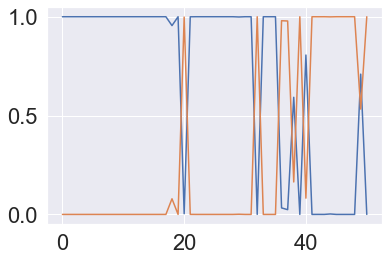

In [55]:
plt.plot(y_predict)

In [56]:
y_predict_1D = y_predict[:,0]

In [57]:
y_predict_1D_processed = 1- y_predict_1D

In [58]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [59]:
auc_rf

0.9796296296296296

In [60]:
x = y = np.arange(0,1.1,0.1)

In [61]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [62]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of 18p11', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_05_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [63]:
auc_value = auc(fpr, tpr)

In [64]:
print('AUC is ', auc_value)

AUC is  0.9796296296296296


# Results

In [65]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.902


In [66]:
print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.92      0.94      0.93        36
chr_18_p11_deletion       0.86      0.80      0.83        15

          micro avg       0.90      0.90      0.90        51
          macro avg       0.89      0.87      0.88        51
       weighted avg       0.90      0.90      0.90        51



In [67]:
type(performanceReport)

str

In [68]:
confusion

chr_18  chr_18_p11_deletion
chr_18                   34                    2
chr_18_p11_deletion       3                   12

In [69]:
print('AUC is ', auc_value)

AUC is  0.9796296296296296


## Export to a text file

In [70]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()